### Part 1: Setup and Extraction

In [ ]:
import os
import zipfile

# Define the path to your zip file
zip_file_path = 'PetImages.zip'  # Update with your zip file path
extracted_folder_path = 'extracted_images'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# Define the path to the extracted folder containing "dogs" and "cats" subfolders
path_to_data = os.path.join(extracted_folder_path, 'PetImages')

print(f"Extracted images to: {path_to_data}")


Extracted images to: extracted_images\PetImages


In [ ]:
import os

# List contents of the extracted folder
extracted_folder_path = 'extracted_images'
print("Contents of the extracted folder:")
for root, dirs, files in os.walk(extracted_folder_path):
    print(f"Directory: {root}")
    for dir_name in dirs:
        print(f"Subdirectory: {dir_name}")
    for file_name in files:
        print(f"File: {file_name}")


Contents of the extracted folder:
Directory: extracted_images
Subdirectory: PetImages
Directory: extracted_images\PetImages
Subdirectory: Cat
Subdirectory: Dog
Directory: extracted_images\PetImages\Cat
File: 0.jpg
File: 1.jpg
File: 10.jpg
File: 100.jpg
File: 1000.jpg
File: 10000.jpg
File: 10001.jpg
File: 10002.jpg
File: 10003.jpg
File: 10004.jpg
File: 10005.jpg
File: 10006.jpg
File: 10007.jpg
File: 10008.jpg
File: 10009.jpg
File: 1001.jpg
File: 10010.jpg
File: 10011.jpg
File: 10012.jpg
File: 10013.jpg
File: 10014.jpg
File: 10015.jpg
File: 10016.jpg
File: 10017.jpg
File: 10018.jpg
File: 10019.jpg
File: 1002.jpg
File: 10020.jpg
File: 10021.jpg
File: 10022.jpg
File: 10023.jpg
File: 10024.jpg
File: 10025.jpg
File: 10026.jpg
File: 10027.jpg
File: 10028.jpg
File: 10029.jpg
File: 1003.jpg
File: 10030.jpg
File: 10031.jpg
File: 10032.jpg
File: 10033.jpg
File: 10034.jpg
File: 10035.jpg
File: 10036.jpg
File: 10037.jpg
File: 10038.jpg
File: 10039.jpg
File: 1004.jpg
File: 10040.jpg
File: 10041.jpg


### Part 2: Load Images and Labels

In [ ]:
import cv2
import numpy as np

def load_data(path):
    images = []
    labels = []
    for label in ["Dog", "Cat"]:
        folder_path = os.path.join(path, label)
        if not os.path.exists(folder_path):
            print(f"Directory not found: {folder_path}")
            continue
        print(f"Loading images from: {folder_path}")
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            print(f"Loading image: {img_path}")  # Debug print
            img = cv2.imread(img_path)
            if img is None:
                print(f"Failed to load image: {img_path}")
                continue
            img = cv2.resize(img, (64, 64))  # Resize to a fixed size
            images.append(img)
            labels.append(0 if label == "Dog" else 1)
    return np.array(images), np.array(labels)

# Load images and labels
images, labels = load_data(path_to_data)
print(f"Loaded {len(images)} images")


Loading images from: extracted_images\PetImages\Dog
Loading image: extracted_images\PetImages\Dog\0.jpg
Loading image: extracted_images\PetImages\Dog\1.jpg
Loading image: extracted_images\PetImages\Dog\10.jpg
Loading image: extracted_images\PetImages\Dog\100.jpg
Loading image: extracted_images\PetImages\Dog\1000.jpg
Loading image: extracted_images\PetImages\Dog\10000.jpg
Loading image: extracted_images\PetImages\Dog\10001.jpg
Loading image: extracted_images\PetImages\Dog\10002.jpg
Loading image: extracted_images\PetImages\Dog\10003.jpg
Loading image: extracted_images\PetImages\Dog\10004.jpg
Loading image: extracted_images\PetImages\Dog\10005.jpg
Loading image: extracted_images\PetImages\Dog\10006.jpg
Loading image: extracted_images\PetImages\Dog\10007.jpg
Loading image: extracted_images\PetImages\Dog\10008.jpg
Loading image: extracted_images\PetImages\Dog\10009.jpg
Loading image: extracted_images\PetImages\Dog\1001.jpg
Loading image: extracted_images\PetImages\Dog\10010.jpg
Loading ima

### Part 3: Feature Extraction

In [ ]:
from skimage.feature import hog
from skimage import color

def extract_hog_features(images):
    hog_features = []
    for img in images:
        # Convert image to grayscale
        gray_img = color.rgb2gray(img)
        features, _ = hog(gray_img, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2),
                          visualize=True)
        hog_features.append(features)
    return np.array(hog_features)

features = extract_hog_features(images)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(features, labels, images, test_size=0.2, random_state=42)


svm = SVC(kernel='linear')
svm.fit(X_train, y_train)


y_pred = svm.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print(classification_report(y_test, y_pred, target_names=["Dog", "Cat"]))

Accuracy: 73.25%
              precision    recall  f1-score   support

         Dog       0.73      0.75      0.74      2523
         Cat       0.74      0.71      0.73      2460

    accuracy                           0.73      4983
   macro avg       0.73      0.73      0.73      4983
weighted avg       0.73      0.73      0.73      4983



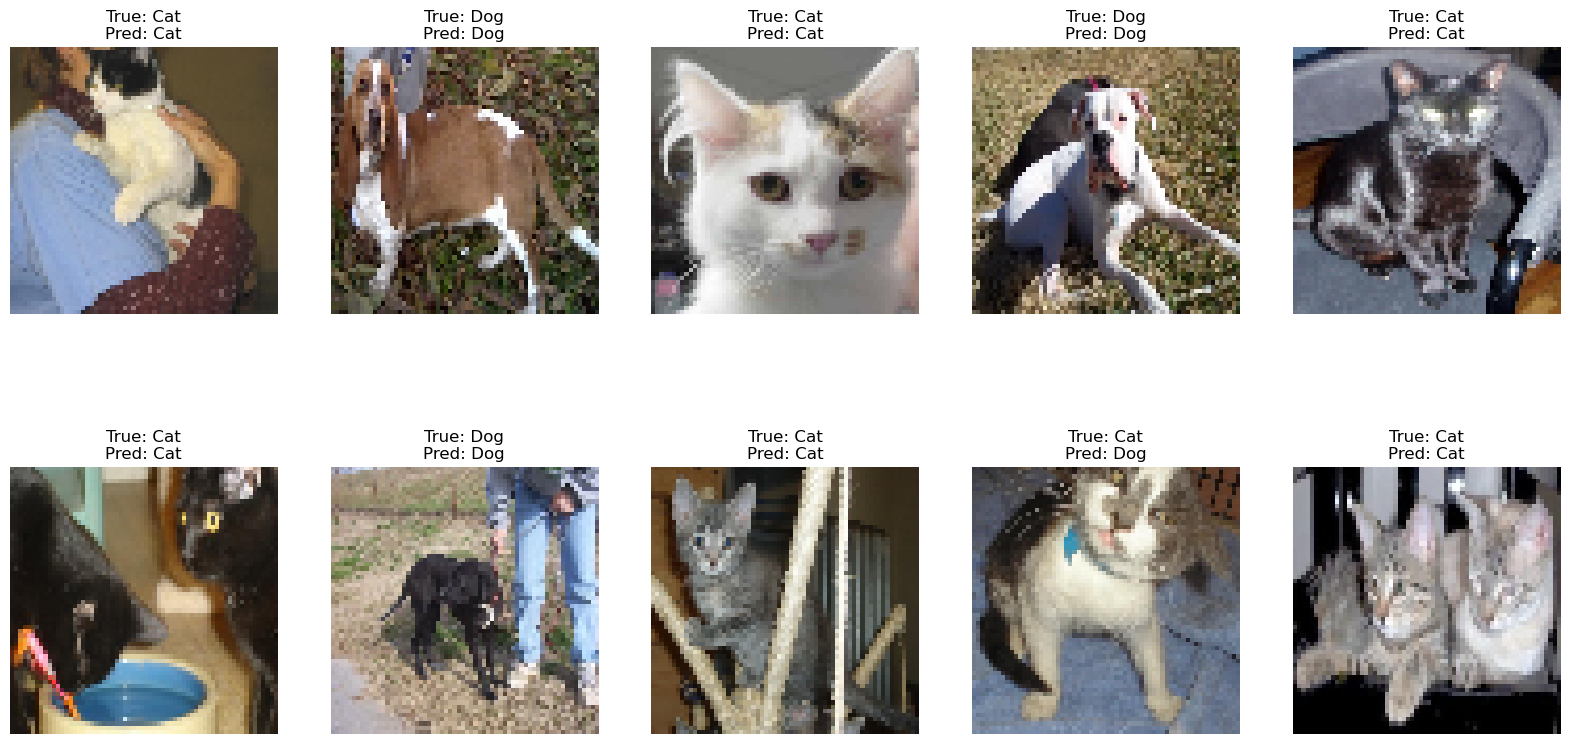

In [ ]:
import matplotlib.pyplot as plt

def show_images(images, true_labels, predicted_labels, num_images=10):
    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(f"True: {'Dog' if true_labels[i] == 0 else 'Cat'}\nPred: {'Dog' if predicted_labels[i] == 0 else 'Cat'}")
        plt.axis('off')
    plt.show()

# Show images with predictions
show_images(images_test, y_test, y_pred, num_images=10)
